In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from pygoogle_image import image as pi
import random
import PIL
import pickle 

In [2]:
pi.download(keywords="ai generated images", limit=100, directory='./ai_generated/')
pi.download(keywords="ai generated art", limit=100, directory='./ai_generated/')
pi.download(keywords="ai generated characters", limit=100, directory='./ai_generated/')
pi.download(keywords='stable diffusion', limit=100, directory='./ai_generated/')
pi.download(keywords='dalle2 generated images', limit=100, directory='./ai_generated/')
pi.download(keywords='midjourney', limit=100, directory='./ai_generated/')
pi.download(keywords='landscapes', limit=100, directory='./real/')
pi.download(keywords='cityscapes', limit=100, directory='./real/')
pi.download(keywords='animals', limit=100, directory='./real/')
pi.download(keywords='vehicles', limit=50, directory='./real/')
pi.download(keywords='traffic', limit=50, directory='./real/')
pi.download(keywords='offices', limit=50, directory='./real/')
pi.download(keywords='real food images', limit=50, directory='./real/')

[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[=======================================

In [60]:
data = r"C:\Users\ishan\OneDrive\Documents\dataset"
categories = ['Real', 'AI']

In [61]:
img_size = 48

In [62]:
img_size = 48
training_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        training_data.append([new_array, classes])

In [63]:
img_size = 48
training_data = []

i = 0
for category in categories:
    path = os.path.join(data, category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i += 1
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        
        # Check if the image was loaded successfully
        if img_array is None:
            print(f"Warning: Could not load image {img_path}. Skipping...")
            continue  # Skip this image and move to the next one
        
        try:
            # Resize and normalize the image if it was loaded successfully
            new_array = cv.resize(img_array, (img_size, img_size))
            new_array = new_array / 255  # Normalize the image
            training_data.append([new_array, classes])
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")


In [64]:
len(training_data), training_data[0][0].shape

(976, (48, 48, 3))

In [65]:
random.shuffle(training_data)

In [66]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [67]:
X_train.shape

(976, 48, 48, 3)

In [68]:

y_train.shape

(976,)

In [69]:
X_train[0].shape

(48, 48, 3)

In [70]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [71]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [72]:
X_train.shape

(976, 48, 48, 3)

In [73]:
y_train.shape

(976,)

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [75]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\ishan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5240 - loss: 0.6954
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5609 - loss: 0.6877
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5927 - loss: 0.6649
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6140 - loss: 0.6631
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6332 - loss: 0.6371
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6392 - loss: 0.6453
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6393 - loss: 0.6423
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6563 - loss: 0.6298
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6707 - loss: 0.6266
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6964 - loss: 0.5764
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6707 - loss: 0.5983
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy:

In [78]:
model.save("AIGeneratedModel.h5")

In [79]:
model_new = keras.models.load_model("AIGeneratedModel.h5")

In [80]:
data = r"C:\Users\ishan\OneDrive\Documents\dataset"
categories = ['Real', 'AI']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])
        
random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [81]:
model_new.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7438 - loss: 0.5194


[0.5192108750343323, 0.7387295365333557]

In [82]:
y_pred = model_new.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [83]:
X_test.shape

(976, 48, 48, 3)

In [84]:
y_test.shape

(976,)

In [85]:
y_pred.shape

(976, 1)

In [86]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [87]:
y_predicted.shape

(976,)

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       437
           1       0.85      0.64      0.73       539

    accuracy                           0.74       976
   macro avg       0.76      0.75      0.74       976
weighted avg       0.77      0.74      0.74       976



In [89]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
The given image is AI Generated.


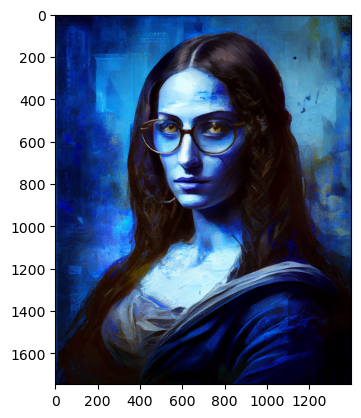

In [94]:
path_img = r"C:\Users\ishan\OneDrive\Documents\dataset\Ai\1u7_j9GJ8BuLJv529Og-Tgg.png"
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The given image is Real.


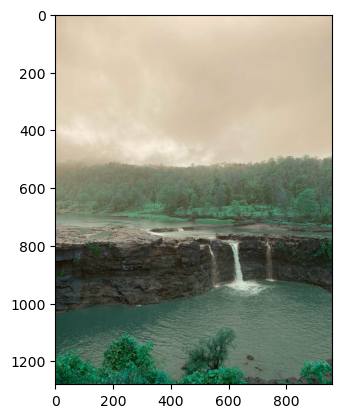

In [95]:
path_img = r"C:\Users\ishan\OneDrive\Documents\dataset\Real\WhatsApp Image 2024-09-29 at 14.00.09_1895c8dc.jpg"
find_out(path_img)